<a href="https://colab.research.google.com/github/Bilal4801/DL-projects/blob/main/Image_Captioning_using_Transformer_Models_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

Image captioning involves translating an image into a textual description. We use Vision Transformers (ViT) and PyTorch backend. The article and code demonstrates using trained models without retraining from scratch to generate image captions.

# Importing Required Libraries

In [1]:
# Installing Transformer Libraries
!pip install transformers

In [2]:
# Web links Handler
import requests

# Backend
import torch

# Image Processing
from PIL import Image

# Transformer and Pretrained Model
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast

# Managing loading processsing
from tqdm import tqdm

# Assign available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Using a Trained Model

In [3]:
# Loading a fine-tuned image captioning Transformer Model

# ViT Encoder - Decoder Model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)

# Corresponding ViT Tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Image processor
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

# Preparing Image Data

Preparing image for capturing

In [4]:
# Accesssing images from the web
import urllib.parse as parse
import os
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# Performing Inference on Image

In [5]:
# Image inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)

    # Preprocessing the Image
    img = image_processor(image, return_tensors="pt").to(device)

    # Generating captions
    output = model.generate(**img)

    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    return caption

# Loading and Capturing Images

In [6]:
#  Image media display
from IPython.display import display

*Example 1.*

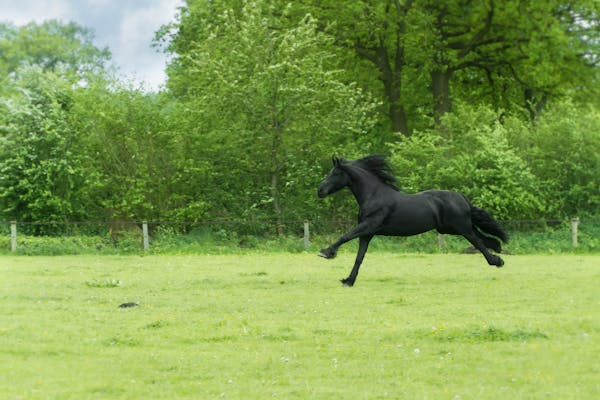

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a black horse running through a grassy field '

In [7]:
# Loading URLs
url = "https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=600"

# Display Image
display(load_image(url))

# Display Caption
get_caption(model, image_processor, tokenizer, url)

*Example 2.*

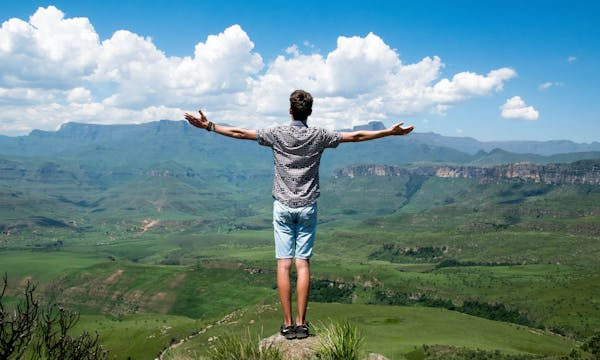

'a man standing on top of a hill with a mountain '

In [8]:
# Loading URLs
url = "https://images.pexels.com/photos/103123/pexels-photo-103123.jpeg?auto=compress&cs=tinysrgb&w=600"

# Display Image
display(load_image(url))

# Display Caption
get_caption(model, image_processor, tokenizer, url)

*Example 3.*

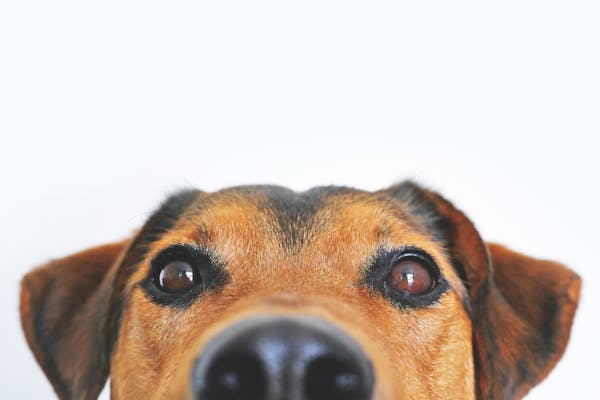

'a dog with a long nose '

In [9]:
# Loading URLs
url = "https://images.pexels.com/photos/406014/pexels-photo-406014.jpeg?auto=compress&cs=tinysrgb&w=600"

# Display Image
display(load_image(url))

# Display Caption
get_caption(model, image_processor, tokenizer, url)

In [ ]:
https://www.91-cdn.com/hub/wp-content/uploads/2023/06/Best-Instagram-captions-for-boys.png